Data from [NCBI Bioproject](https://www.ncbi.nlm.nih.gov/Traces/study/?query_key=10&WebEnv=MCID_65633c9dda4f626312e4bd9e&o=acc_s%3Aa) from the paper [Aberrant B cell repertoire selection associated with HIV neutralizing antibody breadth](https://www.nature.com/articles/s41590-019-0581-0)

From the paper:  
we analyze antibody heavy-chain (IGH) gene repertoires in 96 patients with chronic HIV infection  
- (46 patients with extensive neutralizing breath (bNAb) 
- and 50 patients without neutralizing breadth (noNAb)) 
- and 43 HIV-uninfected controls from the same geographical regions


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
!mkdir img_CONFIG2
out_path ='img_CONFIG2/'
!mkdir '6_cls_unlabel_dataset_CONFIG2'

mkdir: cannot create directory ‘img_CONFIG2’: File exists
mkdir: cannot create directory ‘6_cls_unlabel_dataset_CONFIG2’: File exists


# DATA INFO

In [2]:
meta_data=pd.read_csv('PRJNA486667_SraRunTable.txt')
meta_data

,Run,Age,aliquot,Assay Type,AvgSpotLen,Bases,BIOMATERIAL_PROVIDER,BioProject,BioSample,BioSampleModel,...,ReleaseDate,create_date,version,Sample Name,sample_type,sequencing_run (run),sex,SRA Study,subject,tissue
0,SRR7717525,22,1,AMPLICON,332,12393194,not applicable,PRJNA486667,SAMN09861793,Human,...,2019-09-16T00:00:00Z,2018-08-19T16:04:00Z,1,M132-S067,gDNA,M132,male,SRP158331,705010614,PBMC
1,SRR7717529,19,1,AMPLICON,332,12079051,not applicable,PRJNA486667,SAMN09861775,Human,...,2019-09-16T00:00:00Z,2018-08-19T16:04:00Z,1,M132-S057,gDNA,M132,female,SRP158331,704010453,PBMC
2,SRR7717547,21,1,AMPLICON,331,10937064,not applicable,PRJNA486667,SAMN09861691,Human,...,2019-09-16T00:00:00Z,2018-08-19T16:04:00Z,1,M132-S004,gDNA,M132,female,SRP158331,704010146,PBMC
3,SRR7717548,32,1,AMPLICON,333,13604636,not applicable,PRJNA486667,SAMN09861695,Human,...,2019-09-16T00:00:00Z,2018-08-19T16:04:00Z,1,M132-S006,gDNA,M132,male,SRP158331,700010189,PBMC
4,SRR7717549,41,1,AMPLICON,328,10515302,not applicable,PRJNA486667,SAMN09861783,Human,...,2019-09-16T00:00:00Z,2018-08-19T16:04:00Z,1,M132-S061,gDNA,M132,female,SRP158331,706010413,PBMC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,SRR7718887,28,1,AMPLICON,334,10358585,not applicable,PRJNA486667,SAMN09861653,Human,...,2019-09-16T00:00:00Z,2018-08-19T18:24:00Z,1,M114-S021,gDNA,M114,male,SRP158331,704010486,PBMC
419,SRR7718905,26,1,AMPLICON,329,10025323,not applicable,PRJNA486667,SAMN09861681,Human,...,2019-09-16T00:00:00Z,2018-08-19T18:24:00Z,1,M114-S049,gDNA,M114,female,SRP158331,705010801,PBMC
420,SRR7718907,30,1,AMPLICON,330,11694135,not applicable,PRJNA486667,SAMN09861641,Human,...,2019-09-16T00:00:00Z,2018-08-19T18:24:00Z,1,M114-S053,gDNA,M114,male,SRP158331,703010314,PBMC
421,SRR7718908,21,1,AMPLICON,332,10460960,not applicable,PRJNA486667,SAMN09861615,Human,...,2019-09-16T00:00:00Z,2018-08-19T18:24:00Z,1,M114-S030,gDNA,M114,female,SRP158331,703010564,PBMC


In [3]:
print('Number of unique patients')  #139
print(len(meta_data['subject'].unique()))
print('Diseases:')  
print(meta_data['disease'].unique())

Number of unique patients
139
Diseases:
['HIV Non Neutralizing' 'HIV Negative' 'HIV Broad Neutralizing']


# HIV BNABS DATA (WITHOUT KEEPING A PATIENT OUT AS CONTROL == ALL DATA AVAILABLE)

In [4]:
# 2 min
bnabs = pd.read_csv('HIV_BNABS/HIV_BNABS_noredundancyh3.tsv',sep='\t', on_bad_lines='skip') #486361
# Splitting 'sequence_id' into 'subject' and 'index'
bnabs[['Run', 'index']] = bnabs['sequence_id'].str.split('.', expand=True)
bnabs = bnabs[bnabs['v_identity'] <= 100].dropna(subset='v_identity') # there an entry with 130 as value
bnabs.head(3)

/tmp/ipykernel_213569/4026605594.py:2: DtypeWarning: Columns (17,18,19,20,21,22,23,24,37,62,66,67,68,77,81,82,83,85,87,88,89) have mixed types. Specify dtype option on import or set low_memory=False.
  bnabs = pd.read_csv('HIV_BNABS/HIV_BNABS_noredundancyh3.tsv',sep='\t', on_bad_lines='skip') #486361


,sequence_id,sequence,locus,stop_codon,vj_in_frame,v_frameshift,productive,rev_comp,complete_vdj,v_call,...,np1_length,np2,np2_length,v_family,d_family,j_family,c_family,cdr3_aa_length,Run,index
0,SRR7717557.15415,CGGGGAGTCTCTGAAGGATCTCCTGTGCAGCCTCTGGATTCACCTT...,IGH,T,T,T,F,T,F,"IGHV3-21*01,IGHV3-21*02",...,8.0,NaN,NaN,IGHV3-21,NaN,IGHJ6,NaN,11.0,SRR7717557,15415
1,SRR7717557.15416,TCGCAGACCCTCTCACTCACCTGTGCTGTCTATGGTGGGTCCTTCA...,IGH,F,T,F,T,T,F,"IGHV4-34*01,IGHV4-34*02",...,2.0,TCTGTCACGGGGCC,14.0,IGHV4-34,IGHD1-14,IGHJ4,NaN,13.0,SRR7717557,15416
2,SRR7717557.15417,CTGGGGGGTCCCTGAGACTCTCCTGTGCAGCCTCTGGGTTCACCTT...,IGH,F,T,F,T,T,F,"IGHV3-73*01,IGHV3-73*02",...,5.0,CCCTT,5.0,IGHV3-73,IGHD1-26,IGHJ6,NaN,14.0,SRR7717557,15417


Text(0.5, 1.0, 'Non unique CDRH3')

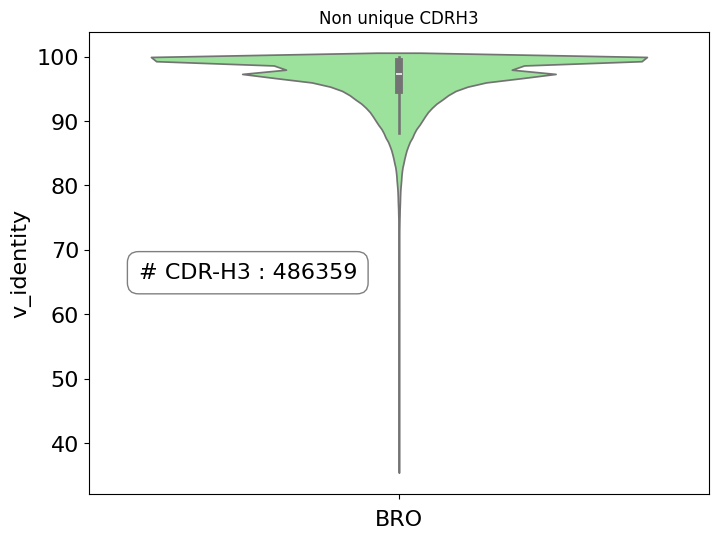

In [5]:
## with duplicates
bnabs_v_identity= bnabs[['v_identity']].sort_values(by='v_identity')
# Violin plot for 'v_identity'
plt.figure(figsize=(8, 6))
sns.violinplot(y='v_identity', data=bnabs, color='lightgreen')
plt.ylabel('v_identity', fontsize=16)
plt.xlabel('BRO', fontsize=16)
plt.text(0.08, 0.5, f'# CDR-H3 : {len(bnabs_v_identity)}', ha='left', va='top', fontsize=16, transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5, boxstyle='round,pad=0.5'))
plt.tick_params(axis='both', labelsize=16)
plt.title('Non unique CDRH3')

In [6]:
## removing duplicates
bnabs = bnabs.drop_duplicates(subset='cdr3_aa',keep='first')
bnabs.dropna(subset=['cdr3_aa'], inplace=True)

Text(0.5, 1.0, 'CDRH3 unique')

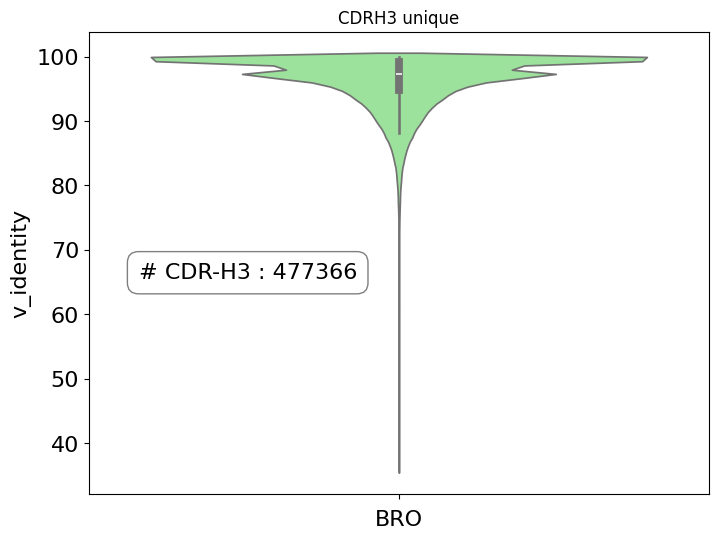

In [7]:
## with duplicates
bnabs_v_identity= bnabs[['v_identity']].sort_values(by='v_identity')
# Violin plot for 'v_identity'
plt.figure(figsize=(8, 6))
sns.violinplot(y='v_identity', data=bnabs, color='lightgreen')
plt.ylabel('v_identity', fontsize=16)
plt.xlabel('BRO', fontsize=16)
plt.text(0.08, 0.5, f'# CDR-H3 : {len(bnabs_v_identity)}', ha='left', va='top', fontsize=16, transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5, boxstyle='round,pad=0.5'))
plt.tick_params(axis='both', labelsize=16)
plt.title('CDRH3 unique')

In [8]:
# Filtering rows where 'v_identity' is below 85
bnabs_low_germline = bnabs [bnabs ['v_identity'] < 85]
print('unique potential bnabs with v_identity lower than 85%:',len(bnabs_low_germline)) #10865
print('unique all potential bnabs:',len(bnabs)) #10865

unique potential bnabs with v_identity lower than 85%: 11195
unique all potential bnabs: 477366


# HIV NEU DATA  (WITHOUT KEEPING A PATIENT OUT AS CONTROL == ALL DATA AVAILABLE)

In [9]:
# 2 min
nobnabs = pd.read_csv('HIV_NON/HIV_NON_noredundancyh3.tsv',sep='\t', on_bad_lines='skip') 
print(len(nobnabs))
# Splitting 'sequence_id' into 'subject' and 'index'
nobnabs[['Run', 'index']] = nobnabs['sequence_id'].str.split('.', expand=True)
nobnabs.head(3) #608956

/tmp/ipykernel_213569/3328491614.py:2: DtypeWarning: Columns (12,24,37,38,39,40,56,62,91,93,95,96,97,104,106,108) have mixed types. Specify dtype option on import or set low_memory=False.
  nobnabs = pd.read_csv('HIV_NON/HIV_NON_noredundancyh3.tsv',sep='\t', on_bad_lines='skip')


651469


,sequence_id,sequence,locus,stop_codon,vj_in_frame,v_frameshift,productive,rev_comp,complete_vdj,v_call,...,np1_length,np2,np2_length,v_family,d_family,j_family,c_family,cdr3_aa_length,Run,index
0,SRR7717525.25014,CGGGGAGTCTCTGAAGATCTCCTGTAAGGGTTCTGGATACAGGTTT...,IGH,F,T,F,T,T,F,IGHV5-51*01,...,5.0,TCACC,5.0,IGHV5-51,IGHD6-6,IGHJ4,NaN,14.0,SRR7717525,25014
1,SRR7717525.25015,CGGGGAGTCTCTGAAGATCTCCTGTGCAGCCTCTGGATTCACCTTC...,IGH,F,T,F,T,T,F,IGHV3-11*04,...,5.0,TG,2.0,IGHV3-11,IGHD5-12,IGHJ6,NaN,13.0,SRR7717525,25015
2,SRR7717525.25016,CTGGGGGGTCCCTGAGACTCTCCTGTGCAGCCTCTGGATTCACCTT...,IGH,F,T,F,T,T,F,"IGHV3-21*01,IGHV3-21*02",...,2.0,GGAGGACAAAT,11.0,IGHV3-21,IGHD1-14,IGHJ4,NaN,11.0,SRR7717525,25016


Text(0.5, 1.0, 'Non unique CDRH3')

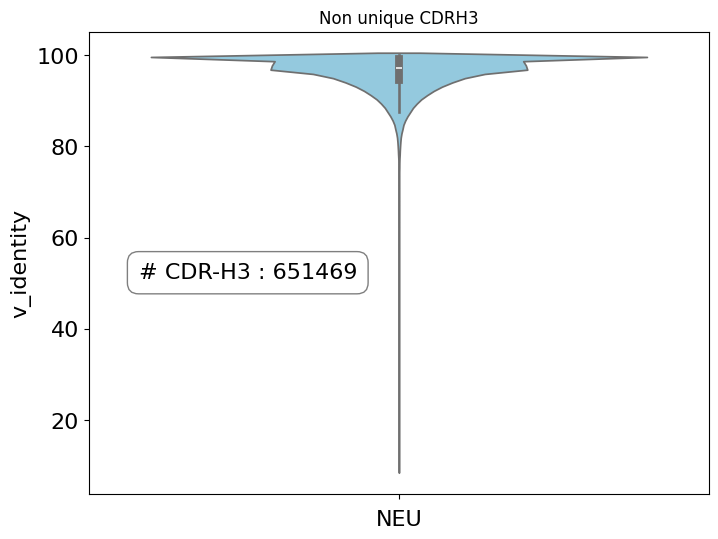

In [10]:
nobnabs_v_identity= nobnabs[['v_identity']].sort_values(by='v_identity')
# Violin plot for 'v_identity'
plt.figure(figsize=(8, 6))
sns.violinplot(y='v_identity', data=nobnabs, color='skyblue')
plt.ylabel('v_identity', fontsize=16)
plt.xlabel('NEU', fontsize=16)
plt.text(0.08, 0.5, f'# CDR-H3 : {len(nobnabs_v_identity)}', ha='left', va='top', fontsize=16, transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5, boxstyle='round,pad=0.5'))
plt.tick_params(axis='both', labelsize=16)
plt.title('Non unique CDRH3')

In [11]:
## removing duplicates
nobnabs = nobnabs.drop_duplicates(subset='cdr3_aa',keep='first')
nobnabs.dropna(subset=['cdr3_aa'], inplace=True)

Text(0.5, 1.0, 'Unique CDRH3')

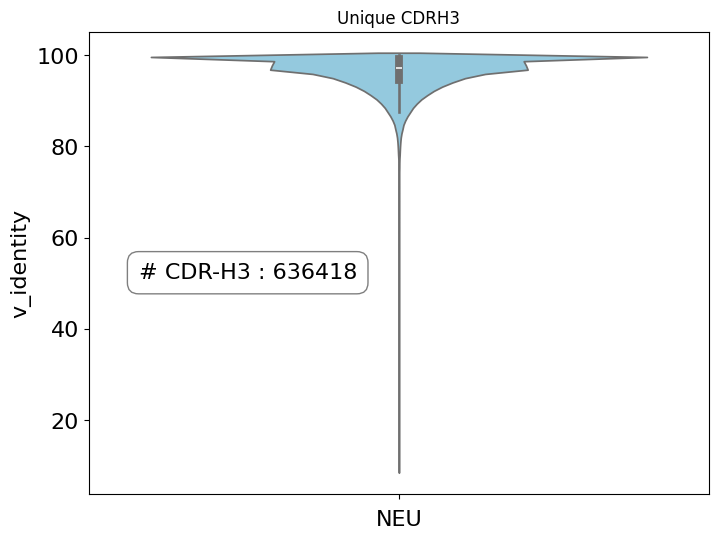

In [12]:
nobnabs_v_identity= nobnabs[['v_identity']].sort_values(by='v_identity')
# Violin plot for 'v_identity'
plt.figure(figsize=(8, 6))
sns.violinplot(y='v_identity', data=nobnabs, color='skyblue')
plt.ylabel('v_identity', fontsize=16)
plt.xlabel('NEU', fontsize=16)
plt.text(0.08, 0.5, f'# CDR-H3 : {len(nobnabs_v_identity)}', ha='left', va='top', fontsize=16, transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5, boxstyle='round,pad=0.5'))
plt.tick_params(axis='both', labelsize=16)
plt.title('Unique CDRH3')

In [13]:
# Filtering rows where 'v_identity' is below 85
nobnabs_low_germline = nobnabs [nobnabs ['v_identity'] < 85]
#nobnabs_low_germline[['sequence_id', 'cdr3_aa','v_identity']].to_csv('6_cls_unlabel_dataset/NEU_UNLABEL.txt',index=False,header=None)
print('unique potential NEU with v_identity lower than 85%:',len(nobnabs_low_germline)) #10840
print('unique all potential NEU:',len(nobnabs)) #10865

unique potential NEU with v_identity lower than 85%: 10850
unique all potential NEU: 636418


# HIV NEGATIVE DATA  (WITHOUT KEEPING A PATIENT OUT AS CONTROL == ALL DATA AVAILABLE)

In [14]:
no = pd.read_csv('HIV_NEG/HIV_NEG_noredundancyh3.tsv',sep='\t', on_bad_lines='skip') 
print(len(no))
# Splitting 'sequence_id' into 'subject' and 'index'
no[['Run', 'index']] = no['sequence_id'].str.split('.', expand=True)
no.head(3)

/tmp/ipykernel_213569/493428189.py:1: DtypeWarning: Columns (12,17,18,19,20,21,22,39,40,91,95,96,97) have mixed types. Specify dtype option on import or set low_memory=False.
  no = pd.read_csv('HIV_NEG/HIV_NEG_noredundancyh3.tsv',sep='\t', on_bad_lines='skip')


608956


,sequence_id,sequence,locus,stop_codon,vj_in_frame,v_frameshift,productive,rev_comp,complete_vdj,v_call,...,np1_length,np2,np2_length,v_family,d_family,j_family,c_family,cdr3_aa_length,Run,index
0,SRR7717547.6004,CGGGGAGTCTCTGAAGATCTCCTGTGCAGCCTCTGGATTCACCTTT...,IGH,T,F,F,F,T,F,IGHV3-9*03,...,4.0,TGGCATCC,8.0,IGHV3-9,IGHD6-19,IGHJ4,NaN,12.0,SRR7717547,6004
1,SRR7717547.6005,CGGGGAGTCTCTGAAGATCTCCTGTGTAGCCTCTGGATTCACCTTT...,IGH,F,T,F,T,T,F,IGHV3-7*01,...,7.0,TCCGGGTGTG,10.0,IGHV3-7,IGHD1-26,IGHJ4,NaN,12.0,SRR7717547,6005
2,SRR7717547.6006,CTTCGGAGACCCTGTCCCTCACCTGCACTGTCACTGGTGGCTCCAT...,IGH,F,T,F,T,T,F,IGHV4-59*01,...,9.0,CTG,3.0,IGHV4-59,IGHD3-10,IGHJ5,NaN,11.0,SRR7717547,6006


Text(0.5, 1.0, 'Non unique CDRH3')

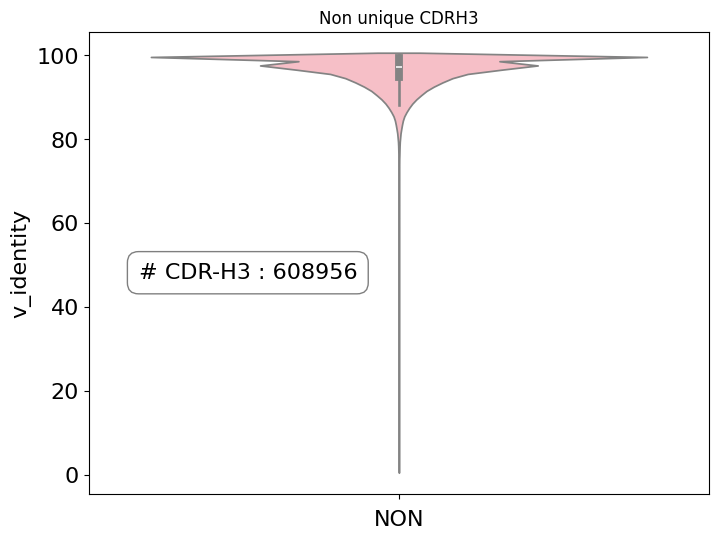

In [15]:
no_v_identity= no[['v_identity']].sort_values(by='v_identity')
# Violin plot for 'v_identity'
plt.figure(figsize=(8, 6))
sns.violinplot(y='v_identity', data=no, color='lightpink')
plt.ylabel('v_identity', fontsize=16)
plt.xlabel('NON', fontsize=16)
plt.text(0.08, 0.5, f'# CDR-H3 : {len(no_v_identity)}', ha='left', va='top', fontsize=16, transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5, boxstyle='round,pad=0.5'))
plt.tick_params(axis='both', labelsize=16)
plt.title('Non unique CDRH3')

In [16]:
## removing duplicates
no = no.drop_duplicates(subset='cdr3_aa',keep='first')
no.dropna(subset=['cdr3_aa'], inplace=True)

Text(0.5, 1.0, 'Unique CDRH3')

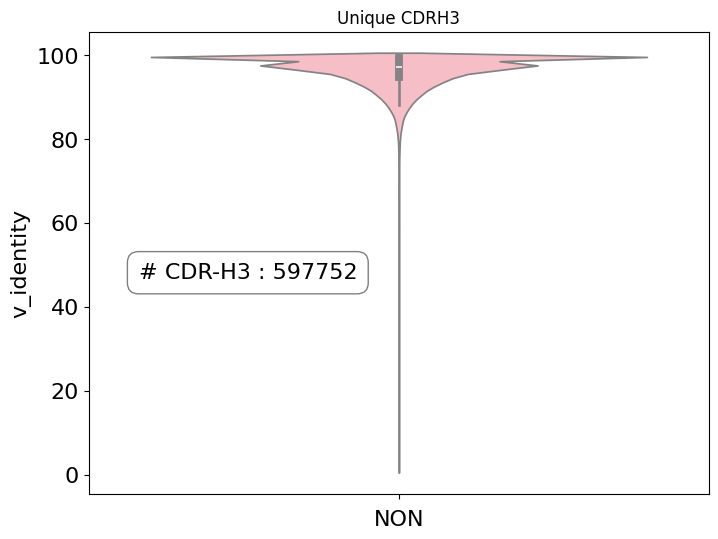

In [17]:
no_v_identity= no[['v_identity']].sort_values(by='v_identity')
# Violin plot for 'v_identity'
plt.figure(figsize=(8, 6))
sns.violinplot(y='v_identity', data=no, color='lightpink')
plt.ylabel('v_identity', fontsize=16)
plt.xlabel('NON', fontsize=16)
plt.text(0.08, 0.5, f'# CDR-H3 : {len(no_v_identity)}', ha='left', va='top', fontsize=16, transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5, boxstyle='round,pad=0.5'))
plt.tick_params(axis='both', labelsize=16)
plt.title('Unique CDRH3')

# plots

/tmp/ipykernel_213569/1181918288.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  violin = sns.violinplot(x='Group', y='v_identity', data=data, palette=custom_palette,)


Text(0.5, 0, '')

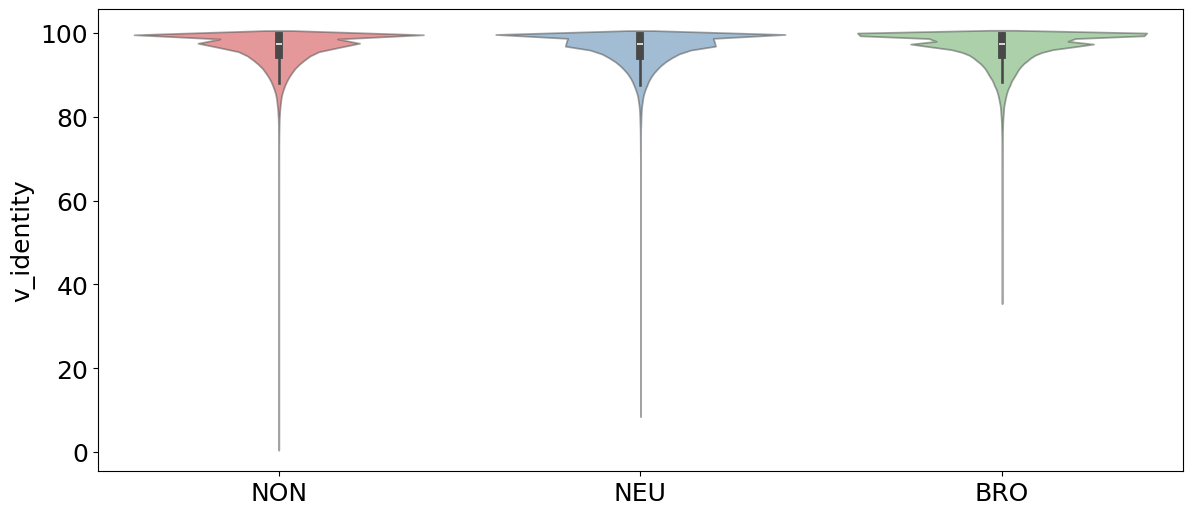

In [18]:
# Assuming you have data for three different violin plots: no_v_identity, nobnabs_v_identity, bnabs_v_identity

# Combine all data into a DataFrame for easier plotting
data = pd.DataFrame({
    'v_identity': no_v_identity['v_identity'].tolist() + nobnabs_v_identity['v_identity'].tolist() + bnabs_v_identity['v_identity'].tolist(),
    'Group': ['NON'] * len(no_v_identity) + ['NEU'] * len(nobnabs_v_identity) + ['BRO'] * len(bnabs_v_identity)
})

custom_palette = sns.color_palette("Set1", n_colors=3)

# Create a violin plot using Seaborn
plt.figure(figsize=(14, 6))
violin = sns.violinplot(x='Group', y='v_identity', data=data, palette=custom_palette,)

for patch in violin.collections:
    patch.set_alpha(0.5) 
plt.ylabel('v_identity', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('')



#plt.savefig(out_path + 'v_identity_cdrh3_unique.png',dpi=300)
#plt.savefig(out_path +'v_identity_cdrh3_unique.svg',dpi=300)


/tmp/ipykernel_213569/4125598446.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  violin = sns.violinplot(x='Group', y='v_identity', data=data, palette=custom_palette,)


Group
BRO    96.233813
NEU    96.238366
NON    96.295439
Name: v_identity, dtype: float64
BRO
NEU
NON


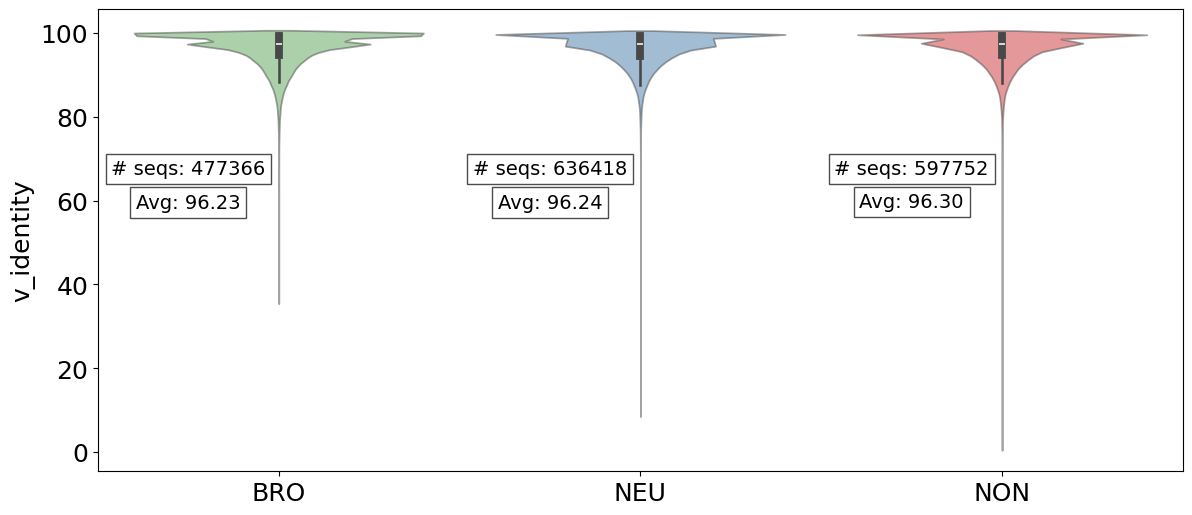

In [19]:
# Assuming you have data for three different violin plots: no_v_identity, nobnabs_v_identity, bnabs_v_identity
# Combine all data into a DataFrame for easier plotting
data = pd.DataFrame({
    'v_identity':  bnabs_v_identity['v_identity'].tolist() + nobnabs_v_identity['v_identity'].tolist() +   no_v_identity['v_identity'].tolist(),
    'Group':  ['BRO'] * len(bnabs_v_identity) +   ['NEU'] * len(nobnabs_v_identity) + ['NON'] * len(no_v_identity)
})

custom_palette = sns.color_palette("Set1", n_colors=3)[::-1]

# Create a violin plot using Seaborn
plt.figure(figsize=(14, 6))
violin = sns.violinplot(x='Group', y='v_identity', data=data, palette=custom_palette,)

for patch in violin.collections:
    patch.set_alpha(0.5) 
plt.ylabel('v_identity', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('')


# Calculate average v_identity per group
avg_values = data.groupby('Group')['v_identity'].mean()
print(avg_values)


# Add text boxes with average v_identity per group
for i, group in enumerate(avg_values.index):
    print(group)
    plt.text(i-0.25, avg_values[group] -38 , f"Avg: {avg_values[group]:.2f}", ha='center', fontsize=14, bbox=dict(facecolor='white', alpha=0.7))
    plt.text(i-0.25, avg_values[group] -30 , f"# seqs: {len(data[data['Group'] ==group]):.0f}", ha='center', fontsize=14, bbox=dict(facecolor='white', alpha=0.7))

#plt.savefig(out_path + 'v_identity_cdrh3_unique_withavg.png',dpi=300)
#plt.savefig(out_path +'v_identity_cdrh3_unique_withavg.svg',dpi=300)


# UNLABEL BRO (LOW GERMLINE & ALL)

In [20]:
bnabs_low_germline[['sequence_id', 'cdr3_aa']]

,sequence_id,cdr3_aa
94,SRR7717557.15511,AKGRFIIPRPDGLDF
431,SRR7717557.15901,ESDLGATP*L
521,SRR7717557.16012,REGRPGLL***WLRGLLIS
735,SRR7717557.16304,REAAGCLRLL*L
738,SRR7717557.16308,ARDHPPDILTGYSGAFDI
...,...,...
477237,SRR7718908.26646,RHDPVL*GLRASRLMIRGSGLDY
477239,SRR7718908.26683,ASSPPRGYYYNSGSFRNDVHDY
477244,SRR7718908.26770,PWSSVCTLGGPPVDY
477293,SRR7718908.28531,ATTHPSGY


In [21]:
bnabs_low_germline[['sequence_id', 'cdr3_aa']].to_csv('6_cls_unlabel_dataset_CONFIG2/BRO_UNLABEL_low_germline.txt',index=False,header=None)
bnabs[['sequence_id', 'cdr3_aa']].to_csv('6_cls_unlabel_dataset_CONFIG2/BRO_UNLABEL.txt',index=False,header=None)
len(bnabs_low_germline) #10865

11195

# UNLABEL NEU ( LOW GERMLINE & ALL)

In [22]:
nobnabs_low_germline[['sequence_id', 'cdr3_aa']]

,sequence_id,cdr3_aa
148,SRR7717525.25175,ECELC*FDS
152,SRR7717525.25179,REPKGSGNHRPVIT
443,SRR7717525.25551,LDSGSTTLQLLWP
700,SRR7717525.25972,AKEDLGVDF
751,SRR7717525.10081,ARDRQYDASGRFSTYLDS
...,...,...
635942,SRR7718909.17475,ARFLGPFNMNVMTCGVWLLSRYGR
635979,SRR7718909.18033,ARFLGPFNMKVMTCGVRLLSRYGR
635993,SRR7718909.18415,TRLIWFPP
636271,SRR7718909.22597,RE*SGSTP


In [23]:
nobnabs_low_germline[['sequence_id', 'cdr3_aa']].to_csv('6_cls_unlabel_dataset_CONFIG2/NEU_UNLABEL_low_germline.txt',index=False,header=None)
nobnabs[['sequence_id', 'cdr3_aa']].to_csv('6_cls_unlabel_dataset_CONFIG2/NEU_UNLABEL.txt',index=False,header=None)
len(nobnabs_low_germline) #10865

10850

# UNLABEL NON (ALL)

In [24]:
no[['sequence_id', 'cdr3_aa']]

,sequence_id,cdr3_aa
0,SRR7717547.6004,AKDLSSGLAS*L
1,SRR7717547.6005,VRGTQELPGVDY
2,SRR7717547.6006,ARAHPDGSGCP
3,SRR7717547.6007,ARRVYGDY
4,SRR7717547.6008,AKQLYDSSGYYPGGAFDI
...,...,...
597748,SRR7718030.35117,ARDQGKGKGYFDY
597749,SRR7718030.35130,AKFTSGLLDTGAFDI
597750,SRR7718030.35137,ATSYNSSGYYPLYYFDY
597751,SRR7718030.35197,ARHGVDGPAPYMAF


In [25]:
no[['sequence_id', 'cdr3_aa']].to_csv('6_cls_unlabel_dataset_CONFIG2/NON_UNLABEL.txt',index=False,header=None)
len(no)  #10153

597752

# CREATE SINGLE DATASETS

In [17]:
!cat 6_cls_unlabel_dataset_CONFIG2/BRO_UNLABEL.txt 6_cls_unlabel_dataset_CONFIG2/NEU_UNLABEL.txt > 6_cls_unlabel_dataset_CONFIG2/BRO_NEU_UNLABEL_ALL_CONFIG2.txt
!cat 6_cls_unlabel_dataset_CONFIG2/BRO_UNLABEL_low_germline.txt 6_cls_unlabel_dataset_CONFIG2/NEU_UNLABEL_low_germline.txt > 6_cls_unlabel_dataset_CONFIG2/BRO_NEU_UNLABEL_low_germline_CONFIG2.txt

In [18]:
# removing duplicates
! awk -F, '!seen[$2]++' 6_cls_unlabel_dataset_CONFIG2/BRO_NEU_UNLABEL_ALL_CONFIG2.txt > 6_cls_unlabel_dataset_CONFIG2/BRO_NEU_UNLABEL_ALL_CONFIG2_noduplicates.txt
print('# cdrh3') 
!wc -l 6_cls_unlabel_dataset_CONFIG2/BRO_NEU_UNLABEL_ALL_CONFIG2.txt
print('# cdrh3 unique') 
!wc -l 6_cls_unlabel_dataset_CONFIG2/BRO_NEU_UNLABEL_ALL_CONFIG2_noduplicates.txt
# print duplicates
# !awk -F, '{ if (++seen[$2] > 1) print }' 6_cls_unlabel_dataset_CONFIG2/BRO_NEU_UNLABEL_ALL_CONFIG2.txt
# moving the files
!cp ./6_cls_unlabel_dataset_CONFIG2/BRO_NEU_UNLABEL_ALL_CONFIG2.txt /ibmm_data/rodelc/DALM/CLS_bnAbs/CDRH3/data/V1_LINCLUST/TRAINING_DATASET/NOIMV/
!cp ./6_cls_unlabel_dataset_CONFIG2/BRO_NEU_UNLABEL_ALL_CONFIG2_noduplicates.txt /ibmm_data/rodelc/DALM/CLS_bnAbs/CDRH3/data/V1_LINCLUST/TRAINING_DATASET/NOIMV/

# cdrh3
1113784 6_cls_unlabel_dataset_CONFIG2/BRO_NEU_UNLABEL_ALL_CONFIG2.txt
# cdrh3 unique
1112442 6_cls_unlabel_dataset_CONFIG2/BRO_NEU_UNLABEL_ALL_CONFIG2_noduplicates.txt


In [19]:
# removing duplicates
! awk -F, '!seen[$2]++' 6_cls_unlabel_dataset_CONFIG2/BRO_NEU_UNLABEL_low_germline_CONFIG2.txt > 6_cls_unlabel_dataset_CONFIG2/BRO_NEU_UNLABEL_low_germline_CONFIG2_noduplicates.txt
print('# cdrh3') 
!wc -l 6_cls_unlabel_dataset_CONFIG2/BRO_NEU_UNLABEL_low_germline_CONFIG2.txt
print('# cdrh3 unique') 
!wc -l 6_cls_unlabel_dataset_CONFIG2/BRO_NEU_UNLABEL_low_germline_CONFIG2_noduplicates.txt
# print duplicates
# !awk -F, '{ if (++seen[$2] > 1) print }' 6_cls_unlabel_dataset_CONFIG2/BRO_NEU_UNLABEL_ALL_CONFIG2.txt
# moving the files
!cp ./6_cls_unlabel_dataset_CONFIG2/BRO_NEU_UNLABEL_low_germline_CONFIG2.txt /ibmm_data/rodelc/DALM/CLS_bnAbs/CDRH3/data/V1_LINCLUST/TRAINING_DATASET/NOIMV/
!cp ./6_cls_unlabel_dataset_CONFIG2/BRO_NEU_UNLABEL_low_germline_CONFIG2_noduplicates.txt /ibmm_data/rodelc/DALM/CLS_bnAbs/CDRH3/data/V1_LINCLUST/TRAINING_DATASET/NOIMV/

# cdrh3
22045 6_cls_unlabel_dataset_CONFIG2/BRO_NEU_UNLABEL_low_germline_CONFIG2.txt
# cdrh3 unique
22039 6_cls_unlabel_dataset_CONFIG2/BRO_NEU_UNLABEL_low_germline_CONFIG2_noduplicates.txt
